In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  as ws
ws.filterwarnings("ignore")

In [30]:
df = pd.read_csv("diabetes-dataset.csv")

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


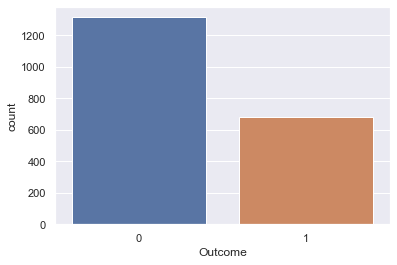

In [32]:
sns.set()
sns.countplot(df["Outcome"])
plt.show()

Above graph clearly shows the class imbalance 

In [33]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# Split the data 
from sklearn.model_selection import train_test_split
X = df.drop(columns =[ "Outcome", "Pregnancies", "DiabetesPedigreeFunction"])
y = df["Outcome"]
X_train , X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42, stratify = y)

In [36]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Fitting the model to the training data
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [38]:
model=[]
model_accuracy=[]

In [39]:

log = LogisticRegression()
model.append('LogisticRegression')
log.fit(X_train_scaled, y_train)
y_pred= log.predict(X_test_scaled)
log_accuracy= accuracy_score(y_pred, y_test)
model_accuracy.append(log_accuracy)
# Evaluating the Random Forest Model
print ("Accuracy on test set is ", round(log.score(X_test_scaled, y_test) * 100, 2), "%")
print ("Accuracy on train set is ", round(log.score(X_train_scaled, y_train) * 100, 2), "%")

Accuracy on test set is  79.25 %
Accuracy on train set is  77.12 %


In [40]:
rfe = RandomForestClassifier()
model.append('RandomForestClassifier')

rfe.fit(X_train_scaled, y_train)
y_pred= rfe.predict(X_test_scaled)
rfe_accuracy= accuracy_score(y_pred, y_test)
model_accuracy.append(rfe_accuracy)
# Evaluating the Random Forest Model
print ("Accuracy on test set is ", round(rfe.score(X_test_scaled, y_test) * 100, 2), "%")
print ("Accuracy on train set is ", round(rfe.score(X_train_scaled, y_train) * 100, 2), "%")

Accuracy on test set is  98.5 %
Accuracy on train set is  100.0 %


In [41]:
dec = DecisionTreeClassifier()
model.append('DecisionTreeClassifier')

dec.fit(X_train_scaled, y_train)
y_pred= dec.predict(X_test_scaled)
dec_accuracy= accuracy_score(y_pred, y_test)
model_accuracy.append(dec_accuracy)

# Evaluating the Random Forest Model
print ("Accuracy on test set is ", round(dec.score(X_test_scaled, y_test) * 100, 2), "%")
print ("Accuracy on train set is ", round(dec.score(X_train_scaled, y_train) * 100, 2), "%")

Accuracy on test set is  100.0 %
Accuracy on train set is  100.0 %


In [42]:
svc = SVC()
model.append('SVC')

svc.fit(X_train_scaled, y_train)
y_pred= rfe.predict(X_test_scaled)
svc_accuracy= accuracy_score(y_pred, y_test)
model_accuracy.append(svc_accuracy)

# Evaluating the Random Forest Model
print ("Accuracy on test set is ", round(svc.score(X_test_scaled, y_test) * 100, 2), "%")
print ("Accuracy on train set is ", round(svc.score(X_train_scaled, y_train) * 100, 2), "%")

Accuracy on test set is  80.5 %
Accuracy on train set is  82.12 %


In [43]:
knn = KNeighborsClassifier()
model.append('KNeighborsClassifier')

knn.fit(X_train_scaled, y_train)
y_pred= rfe.predict(X_test_scaled)
knn_accuracy= accuracy_score(y_pred, y_test)
model_accuracy.append(knn_accuracy)

# Evaluating the Random Forest Model
print ("Accuracy on test set is ", round(knn.score(X_test_scaled, y_test) * 100, 2), "%")
print ("Accuracy on train set is ", round(knn.score(X_train_scaled, y_train) * 100, 2), "%")

Accuracy on test set is  82.5 %
Accuracy on train set is  90.38 %


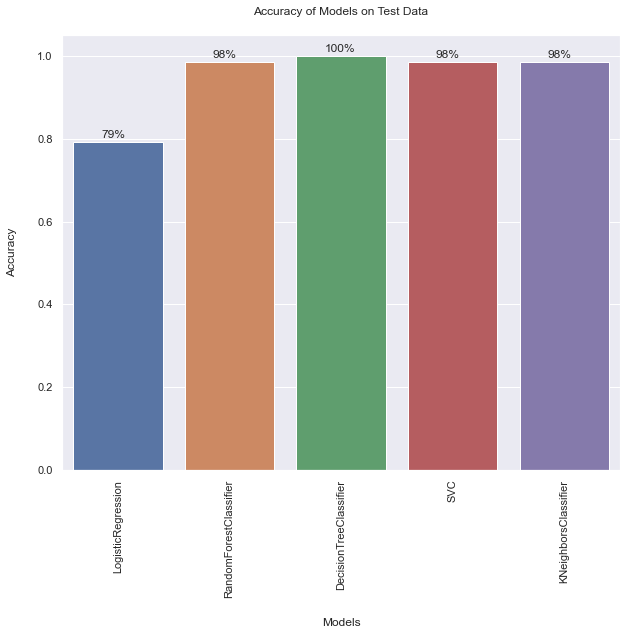

In [44]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model,model_accuracy)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

In [45]:
bagging_models=[]
bagging_accuracy=[]

models_scores=[]

In [46]:
bag_dec= BaggingClassifier(base_estimator=dec)
bagging_models.append('bagging decisionTree')
bag_dec.fit(X_train_scaled, y_train)
bag_dec_pred= bag_dec.predict(X_test_scaled)
bag_dec_accuracy= accuracy_score(bag_dec_pred, y_test)
bagging_accuracy.append(bag_dec_accuracy)
print("The accuracy for the training set is ", bag_dec.score(X_train_scaled, y_train))
print("The accuracy for the test set is ", bag_dec.score(X_test_scaled, y_test))
print("\n")

models_scores.append(['Bagging_DecisionTree', bag_dec_accuracy])

The accuracy for the training set is  0.9975
The accuracy for the test set is  0.9825




In [47]:
bag_ref= BaggingClassifier(base_estimator=rfe)
bagging_models.append('bagging RandomForest')

bag_ref.fit(X_train_scaled, y_train)

bag_ref_pred= bag_ref.predict(X_test_scaled)
bag_ref_accuracy= accuracy_score(bag_ref_pred, y_test)
bagging_accuracy.append(bag_ref_accuracy)
print("The accuracy for the training set is ", bag_ref.score(X_train_scaled, y_train))
print("The accuracy for the test set is ", bag_ref.score(X_test_scaled, y_test))

models_scores.append(['Bagging_RandomForest', bag_ref_accuracy])

The accuracy for the training set is  0.99375
The accuracy for the test set is  0.9575


In [48]:
bag_svc= BaggingClassifier(base_estimator=svc)
bagging_models.append('bagging svc')

bag_svc.fit(X_train_scaled, y_train)

bag_svc_pred= bag_ref.predict(X_test_scaled)
bag_svc_accuracy= accuracy_score(bag_svc_pred, y_test)
bagging_accuracy.append(bag_svc_accuracy)
print("The accuracy for the training set is ", bag_svc.score(X_train_scaled, y_train))
print("The accuracy for the test set is ", bag_svc.score(X_test_scaled, y_test))

models_scores.append(['Bagging_SupportVector', bag_svc_accuracy])

The accuracy for the training set is  0.81875
The accuracy for the test set is  0.8125


In [49]:
bag_knn= BaggingClassifier(base_estimator=knn)
bagging_models.append('bagging knn')

bag_knn.fit(X_train_scaled, y_train)

bag_knn_pred= bag_knn.predict(X_test_scaled)
bag_knn_accuracy= accuracy_score(bag_knn_pred, y_test)
bagging_accuracy.append(bag_knn_accuracy)
print("The accuracy for the training set is ", bag_knn.score(X_train_scaled, y_train))
print("The accuracy for the test set is ", bag_knn.score(X_test_scaled, y_test))

models_scores.append(['Bagging_knn', bag_knn_accuracy])

The accuracy for the training set is  0.918125
The accuracy for the test set is  0.845


In [50]:
bag_log= BaggingClassifier(base_estimator=log)
bagging_models.append('bagging logisticRegression')

bag_log.fit(X_train_scaled, y_train)

bag_log_pred= bag_knn.predict(X_test_scaled)
bag_log_accuracy= accuracy_score(bag_log_pred, y_test)
bagging_accuracy.append(bag_log_accuracy)
print("The accuracy for the training set is ", bag_log.score(X_train_scaled, y_train))
print("The accuracy for the test set is ", bag_log.score(X_test_scaled, y_test))

The accuracy for the training set is  0.77375
The accuracy for the test set is  0.79


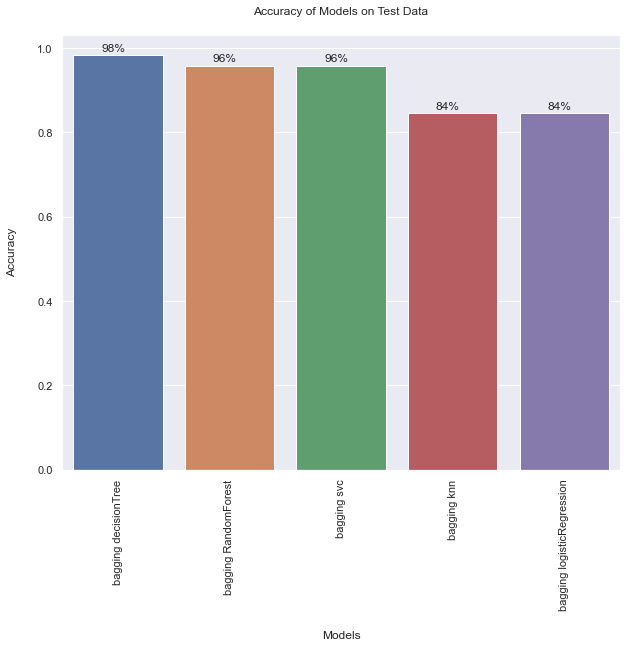

In [51]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(bagging_models,bagging_accuracy)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

In [52]:
boosting_models=[]
boosting_accuracy=[]

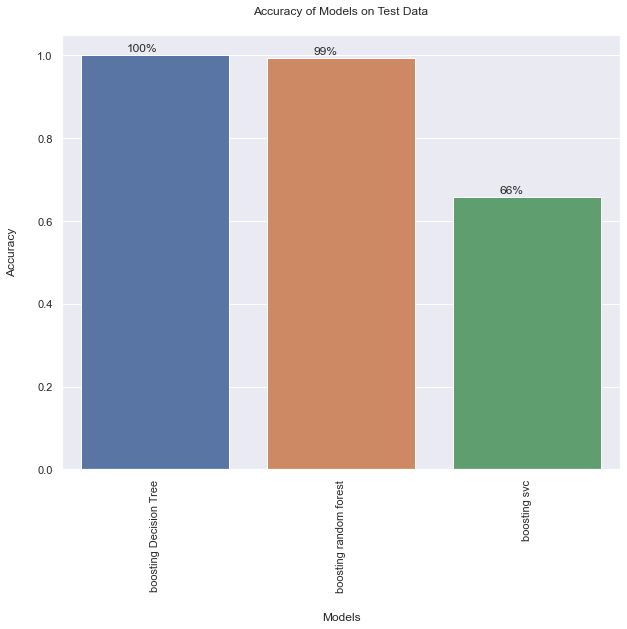

In [53]:
#boosting
ada_dec= AdaBoostClassifier(base_estimator=dec)
boosting_models.append('boosting Decision Tree')
ada_dec.fit(X_train_scaled, y_train)
ada_dec_pred= ada_dec.predict(X_test_scaled)
boost_dec_accuracy= accuracy_score(ada_dec_pred, y_test)
boosting_accuracy.append(boost_dec_accuracy)
models_scores.append(['Adaboosting_DecisionTree', boost_dec_accuracy])

ada_ref= AdaBoostClassifier(base_estimator=rfe)
boosting_models.append('boosting random forest')
ada_ref.fit(X_train_scaled, y_train)
ada_ref_pred= ada_ref.predict(X_test_scaled)
boost_ref_accuracy= accuracy_score(ada_ref_pred, y_test)
boosting_accuracy.append(boost_ref_accuracy)
models_scores.append(['Adaboosting_RandomForest', boost_ref_accuracy])

ada_svc= AdaBoostClassifier(base_estimator=svc, algorithm='SAMME')
boosting_models.append('boosting svc')
ada_svc.fit(X_train_scaled, y_train)
ada_svc_pred= ada_svc.predict(X_test_scaled)
boost_svc_accuracy= accuracy_score(ada_svc_pred, y_test)
boosting_accuracy.append(boost_svc_accuracy)
models_scores.append(['Adaboosting_SupportVector', boost_svc_accuracy])

fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(boosting_models,boosting_accuracy)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

In [54]:
estimators=[]

model1= SVC()
estimators.append(("svc", model1))

model2= DecisionTreeClassifier()
estimators.append(("dec", model2))

model3= model3 = RandomForestClassifier()
estimators.append(("rad", model3))

model4= LogisticRegression()
estimators.append(("log", model4))

model5= KNeighborsClassifier()
estimators.append(("knn", model5))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting="hard")
ensemble.fit(X_train_scaled, y_train)

vot_pred= ensemble.predict(X_test_scaled)
score_vote= accuracy_score(vot_pred, y_test)
print(score_vote*100)
print("\n")
print("The accuracy for the training set is ", ensemble.score(X_train_scaled, y_train))
print("The accuracy for the test set is ", ensemble.score(X_test_scaled, y_test))
print("\n")
models_scores.append(['voting classifier', score_vote])

91.0


The accuracy for the training set is  0.944375
The accuracy for the test set is  0.91




In [55]:

pd.DataFrame(models_scores).sort_values(by=[0], ascending=True)

,0,1
4,Adaboosting_DecisionTree,1.0000
5,Adaboosting_RandomForest,0.9925
6,Adaboosting_SupportVector,0.6575
0,Bagging_DecisionTree,0.9825
1,Bagging_RandomForest,0.9575
2,Bagging_SupportVector,0.9575
3,Bagging_knn,0.8450
7,voting classifier,0.9100


In [56]:
bag_dec = BaggingClassifier(base_estimator=dec)
bagging_models.append('bagging decisionTree')
bag_dec.fit(X_train_scaled, y_train)
bag_dec_pred = bag_dec.predict([[100, 20, 50,60,0.78, 40]]) #labels=[1="Diabetes", 0="Not Diabetes"]
if bag_dec_pred == 1:
    print("Diabetic")
else:
    print("Non Diabetic")

Non Diabetic


In [57]:
import pickle

Pkl_Filename = "Final_Diabetes.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(bag_dec, file)

In [58]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

BaggingClassifier(base_estimator=DecisionTreeClassifier())